<a href="https://colab.research.google.com/github/monjurulkarim/Cellular_automata/blob/master/CNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages here
from keras.preprocessing.image import ImageDataGenerator  #ImageDataGenerator is a built-in keras function to load data
from keras.models import Sequential                       #Sequential groups a linear stack of layers into a keras.Model
# from keras.layers import Conv2D, MaxPooling2D             
from keras.layers import Activation, Flatten, Dense, Conv2D, MaxPooling2D, Dropout     
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

In [ ]:
# #if you use google colab please uncomment this block 
# #Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive/')

# #spcifying the working directory
# # Replace -----/-----/-----/' with the path such that "civ555" is your working directory
%cd '/content/gdrive/My Drive/Stony Brook/civ555'

Mounted at /content/gdrive/
/content/gdrive/My Drive/Stony Brook/civ555


In [ ]:
###################################################
# Loading the training and testing data
##################################################

# Define the dimensions of our input. We will load the data with a much smaller dimension to reduce computation.
img_width, img_height = 28, 28

#Directory of the dataset
train_data_dir = 'toy_data/train'
validation_data_dir = 'toy_data/test'

#number of samples 
nb_train_samples = 960         #number of images inside train directory 
nb_validation_samples = 240    #number of images inside test directory 
epochs = 15
batch_size = 32 # training sample number per batch

#Prepare the training data using the built-in function ImageDataGenerator()
train_datagen = ImageDataGenerator(
    rescale=1. / 255,               #normalizing the pixel values to 0~1
    shear_range=0.2,                #(optional) data augmentation by shearing the input image
    zoom_range=0.2,                 #(optional) data augmentation by zooming in the input image
    horizontal_flip=True)           #(optional) data augmentation by horizontal flipping the image

#Prepare the test data using the built-in function ImageDataGenerator()
test_datagen = ImageDataGenerator(rescale=1. / 255)  #normalizing the pixel values to 0~1


# To load the data we are going to use built-in keras funciont flow_from_directory()
# it takes the path to a directory & generates batches of augmented data as we defined previously.
train_generator = train_datagen.flow_from_directory(  #loading training data
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(  #loading test data
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 960 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

In [ ]:
###############################################
# Configure the model for training.
###############################################
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
#we want to save the best weights in our disk
# we will save the weights when loss on test dataset is minimum
checkpoint = tf.keras.callbacks.ModelCheckpoint('model_best_weights.h5', monitor='val_loss', save_weights_only=True, save_best_only=True, mode='min')

In [ ]:
################################################
# Optimize/Train Network
################################################

# To train the network we will use keras built-in function fit_generator()
# which fits the model on data yielded batch-by-batch by a ImageDataGenerator
import time
start_time = time.time()
history= model.fit(
    train_generator,          
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    verbose=1,    # This is just for the visualization of training progress.
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, callbacks=checkpoint)


end_time = time.time()
print('-------------------------------')
print("Time taken: %s seconds " % (end_time - start_time))

Epoch 1/15
30/30 [==============================] - 401s 13s/step - loss: 0.6662 - accuracy: 0.5990 - val_loss: 0.5203 - val_accuracy: 0.9554
Epoch 2/15
30/30 [==============================] - 5s 156ms/step - loss: 0.3532 - accuracy: 0.8927 - val_loss: 0.2022 - val_accuracy: 0.9375
Epoch 3/15
30/30 [==============================] - 4s 143ms/step - loss: 0.1404 - accuracy: 0.9573 - val_loss: 0.2476 - val_accuracy: 0.9286
Epoch 4/15
30/30 [==============================] - 5s 154ms/step - loss: 0.1011 - accuracy: 0.9719 - val_loss: 0.0926 - val_accuracy: 0.9688
Epoch 5/15
30/30 [==============================] - 4s 145ms/step - loss: 0.0907 - accuracy: 0.9740 - val_loss: 0.1321 - val_accuracy: 0.9643
Epoch 6/15
30/30 [==============================] - 5s 155ms/step - loss: 0.0681 - accuracy: 0.9823 - val_loss: 0.0722 - val_accuracy: 0.9688
Epoch 7/15
30/30 [==============================] - 4s 146ms/step - loss: 0.0714 - accuracy: 0.9792 - val_loss: 0.0418 - val_accuracy: 0.9821
Epoch 

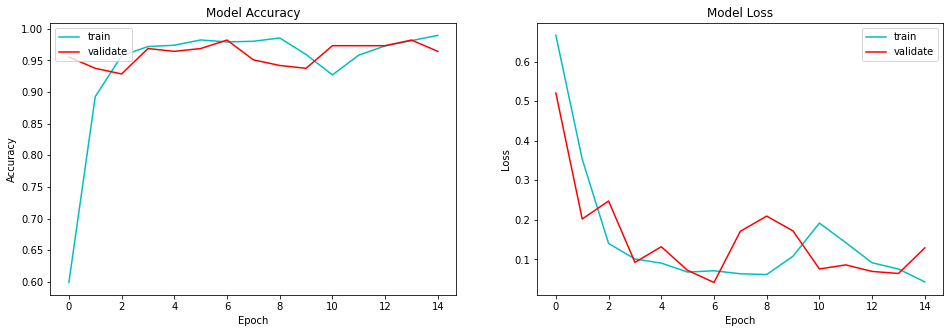

In [ ]:
################################################
# Plotting the training history
################################################

#defining a function to show two charts side by side
def plot_training(history):
    fig, axs = plt.subplots(1,2,figsize=(16,5)) 
    axs[0].plot(history.history['accuracy'], 'c')
    axs[0].plot(history.history['val_accuracy'], 'r')
    axs[0].set_title('Model Accuracy') 
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch') 
    axs[0].legend(['train', 'validate'], loc='upper left') 
    
    axs[1].plot(history.history['loss'], 'c') 
    axs[1].plot(history.history['val_loss'], 'r')
    axs[1].set_title('Model Loss') 
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch') 
    axs[1].legend(['train', 'validate'], loc='upper right') 
    plt.show()

#calling the function to show the charts
plot_training(history)

In [ ]:
# we saved the best weight out of all training epoch
# Now we are loading the best weight from our disk
model.load_weights('model_best_weights.h5')

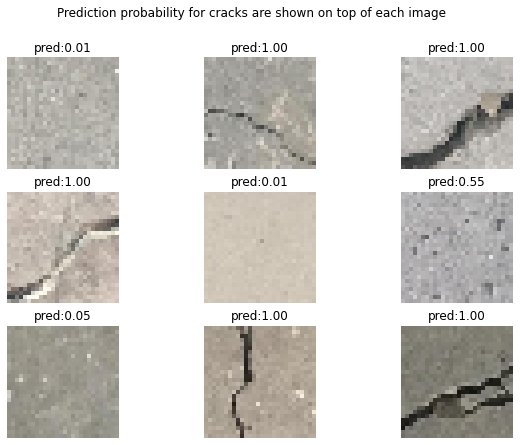

In [ ]:
##################################################
# Visualizing some sample prediction
#################################################
import numpy as np
#taking a batch from the validation dataset
# x is whole batch of the input image 
# y is the corresponding label for all the images of that batch
x,y = validation_generator.next() # with the next function we take next batch. Every time we run this block of code it will take the next batch from the previous run

#predict the batch
prediction = model.predict(x)   #this will give the probability of positive class


# We want to show 9 random images from the predicted batch
# we create 9 random index for visualizing images of those indexes
random_index = []
for i in range(9):
    ran = random.randint(1,31)
    random_index.append(ran)

#plotting the images 
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Prediction probability for cracks are shown on top of each image')
for k,i in enumerate(random_index):
    fig.add_subplot(3, 3, k+1)
    plt.imshow(x[i])
    plt.axis('off')
    plt.title(f'pred:{prediction[i][0]:.2f}' )
plt.show()